Whitening Data

In [165]:
import seaborn as sns
import pandas as pd
import numpy as np

# Load the Old Faithful dataset
X = sns.load_dataset("geyser")[["duration", "waiting"]].values

<Axes: >

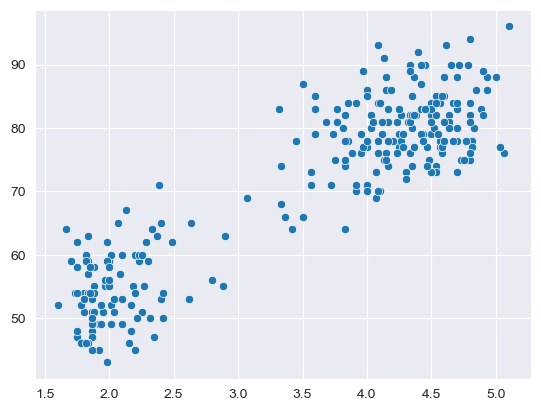

In [166]:
# PLots the data
sns.scatterplot(x=X[:, 0], y=X[:, 1])

In [282]:
# Display the first few rows of the dataset
X_ = X- X.mean(axis=0)
cX = np.cov(X_.T)
U, Sigma, VT = np.linalg.svd(cX)

L = np.diag(Sigma)

# Selecting the principal components
# You can select the top k components based on your needs. For example, k=1 for the first principal component
V = VT.T

In [283]:
L = np.diag(Sigma)
L

array([[185.88182394,   0.        ],
       [  0.        ,   0.24421674]])

In [284]:
X_mean = X.mean(axis=0)
W = np.linalg.inv(np.sqrt(L)) @ U.T
# Y = np.zeros(X.shape)
# for i in range(X.shape[0]):
#     Y[i] =  W @ (X[i] - X_mean)
Y = (X - X_mean) @ W.T

<Axes: >

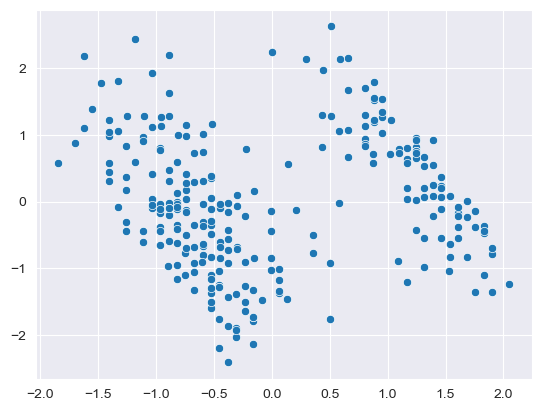

In [285]:
# Plot the whitened data
sns.scatterplot(x=Y[:, 0], y=Y[:, 1])

In [286]:
np.cov(Y.T)

array([[ 1.00000000e+00, -1.67803451e-15],
       [-1.67803451e-15,  1.00000000e+00]])

In [287]:
np.cov(X.T)

array([[  1.30272833,  13.97780785],
       [ 13.97780785, 184.82331235]])

In [288]:
(X - X.mean(axis=0)).T @ (X - X.mean(axis=0)) / (X.shape[0] - 1)

array([[  1.30272833,  13.97780785],
       [ 13.97780785, 184.82331235]])

In [307]:
U2, D2, VT2 = np.linalg.svd(X)

In [308]:
Z = U2

In [309]:
def dW(W, Z):
    WTZ = W.T @ Z
    return Z @ WTZ @ WTZ.T @ WTZ

In [310]:
import numpy as np

def update_weights(w_old, Z, eta):
    # Calculate the dot product w_old^T * Z
    dot_product = np.dot(w_old.T, Z)
    
    # Compute the cubed values of the dot product
    cubed_terms = np.power(dot_product, 3)
    
    # Update w_new according to the specified formula
    w_new = w_old - eta * cubed_terms
    
    # Normalize w_new
    w_new_normalized = w_new / np.linalg.norm(w_new)
    
    return w_new_normalized

def iterate_until_convergence(w_init, Z, eta, tolerance=1e-8, max_iterations=1000):
    w_old = w_init
    for i in range(max_iterations):
        w_new = update_weights(w_old, Z, eta)
        # Check for convergence
        if np.linalg.norm(w_new - w_old) < tolerance:
            print(f"Convergence reached after {i+1} iterations.")
            return w_new
        w_old = w_new
    print("Maximum iterations reached without convergence.")
    return w_old

# Example usage:

w_init = np.random.randn(*Z.shape)  # Random initial weights
eta = 0.01  # Small learning rate

# Iterate until convergence
w_final = iterate_until_convergence(w_init, Z, eta)
print("Final weights:", w_final)


Maximum iterations reached without convergence.
Final weights: [[ 0.00051261 -0.00222417 -0.00351288 ...  0.00360302 -0.00529899
   0.00160582]
 [ 0.00178858 -0.00162278  0.00306639 ...  0.00321534  0.00423357
   0.00233779]
 [ 0.00075149  0.0018055   0.00264873 ... -0.00207011 -0.002828
   0.00068268]
 ...
 [-0.00343788 -0.00645839  0.00496425 ... -0.00109945  0.00215495
   0.00510481]
 [-0.00163892 -0.00024764 -0.00332363 ... -0.00285657 -0.00225612
   0.00022051]
 [ 0.00417351  0.00753223  0.00476588 ...  0.00502541 -0.00505021
  -0.00127307]]


In [313]:
Y = w_final.T @ Z

In [321]:
cov_Y = np.cov(Y)

In [322]:
cov_Y

array([[ 1.37067275e-05,  5.38876005e-07,  6.74552025e-07, ...,
        -6.16105287e-07, -4.25547796e-07,  2.92914461e-07],
       [ 5.38876005e-07,  1.44266190e-05, -1.06100641e-06, ...,
         2.64103168e-07, -1.37054080e-07,  8.44008379e-07],
       [ 6.74552025e-07, -1.06100641e-06,  1.35215455e-05, ...,
         4.74995260e-07, -1.10964946e-06,  1.37153973e-06],
       ...,
       [-6.16105287e-07,  2.64103168e-07,  4.74995260e-07, ...,
         1.38529156e-05,  1.07420359e-06, -9.27181954e-07],
       [-4.25547796e-07, -1.37054080e-07, -1.10964946e-06, ...,
         1.07420359e-06,  1.64020838e-05, -5.89645738e-07],
       [ 2.92914461e-07,  8.44008379e-07,  1.37153973e-06, ...,
        -9.27181954e-07, -5.89645738e-07,  1.37833437e-05]])